# Seeds / Wheat Types
This dataset contains measurements of geometrical properties of kernels belonging to three different varieties of wheat. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes.

## Source
Charytanowicz, M., Niewczas, J., Kulczycki, P., Kowalski, P., & Lukasik, S. (2010). Seeds [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5H30K.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [3]:
cols=['area','perimeter','compactness','length','width','asymmetry','groove','class']
df = pd.read_csv('seeds_dataset.txt', sep='\s+',names = cols)
df.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


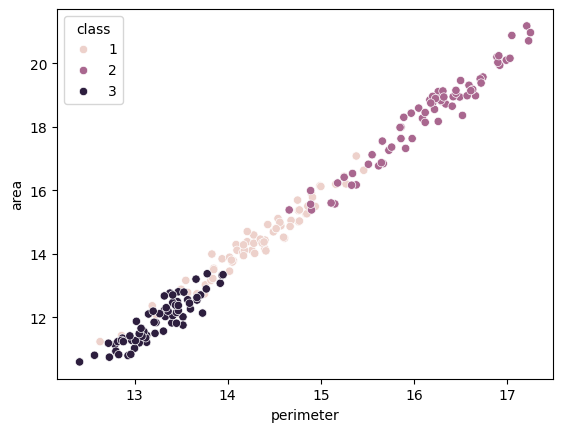

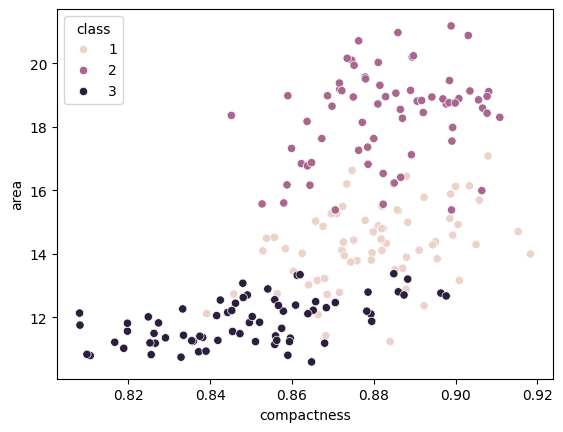

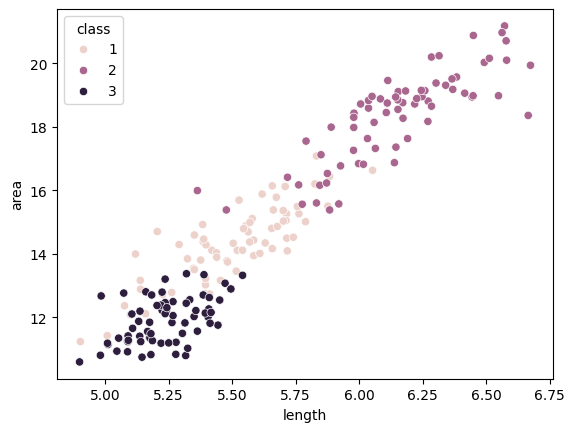

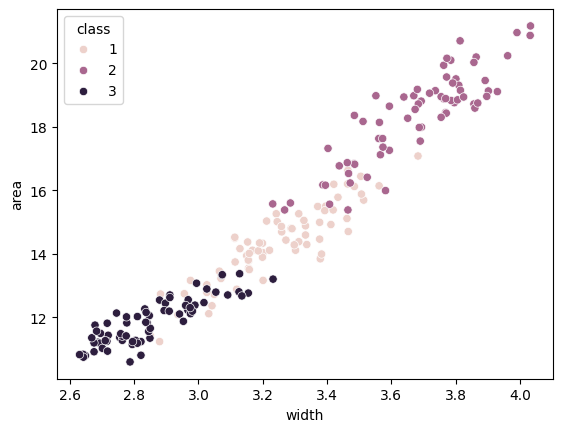

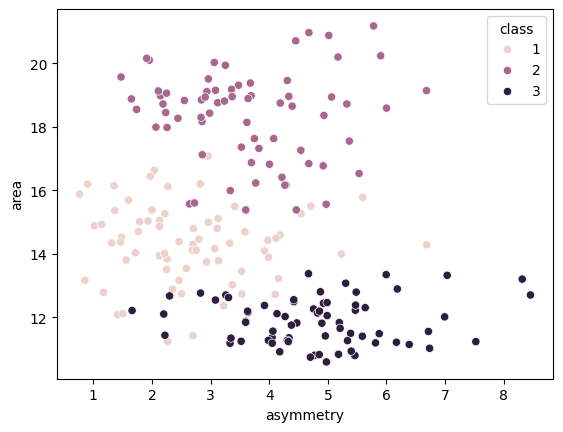

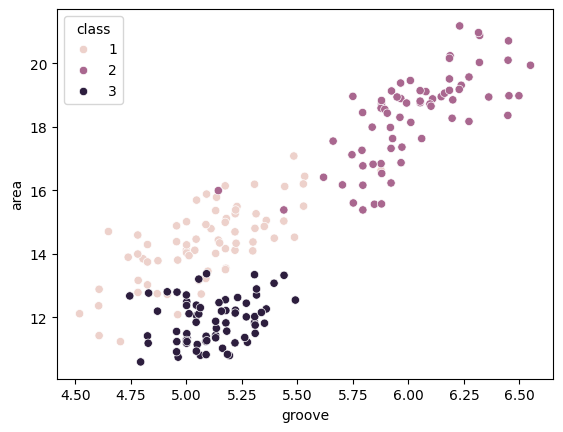

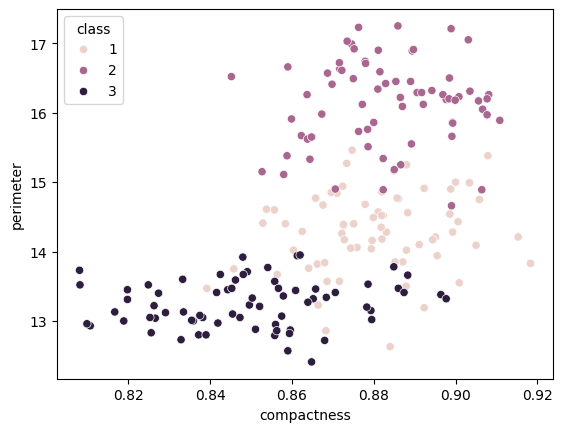

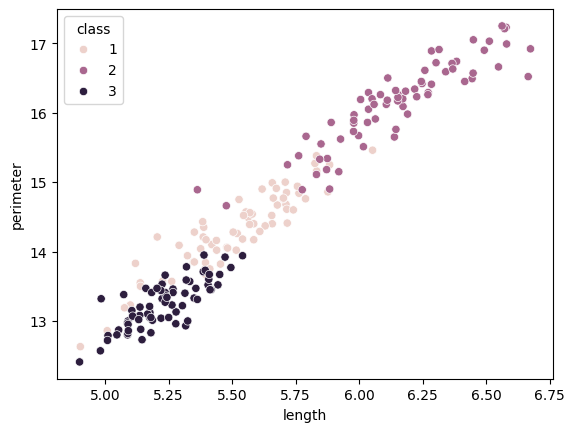

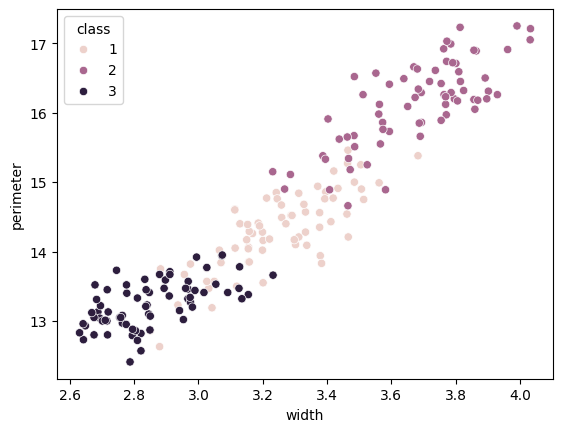

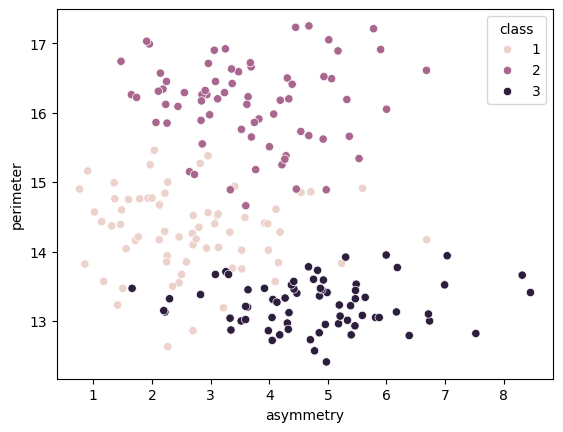

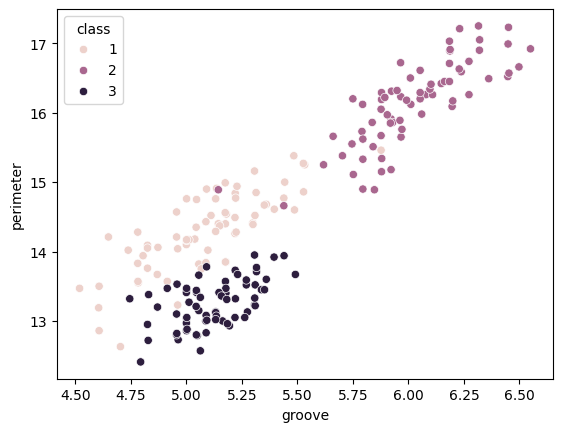

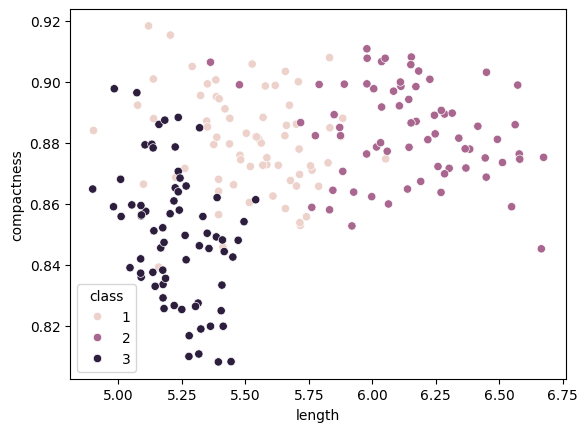

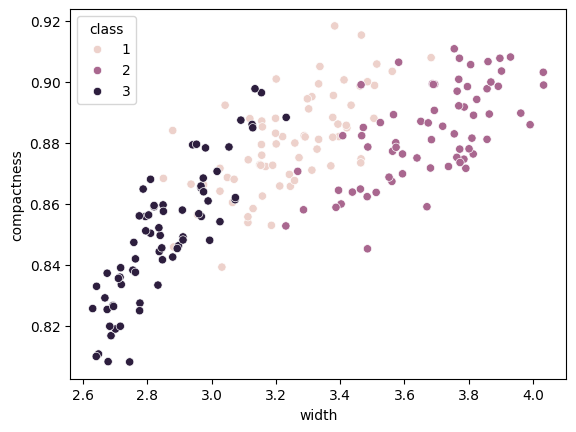

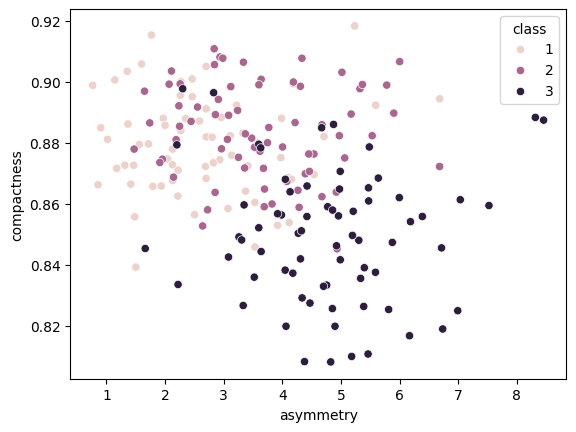

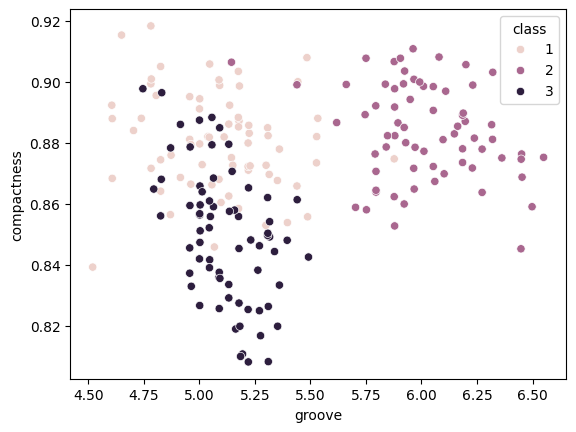

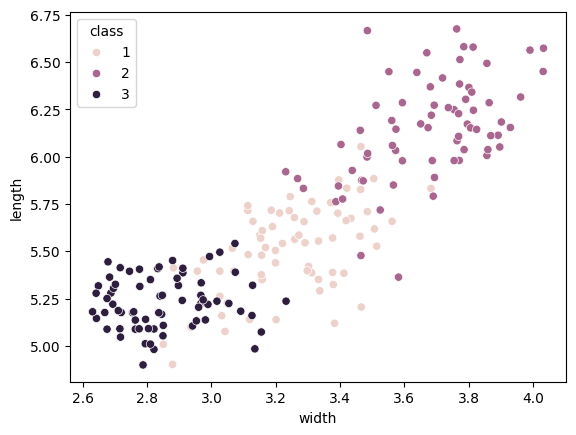

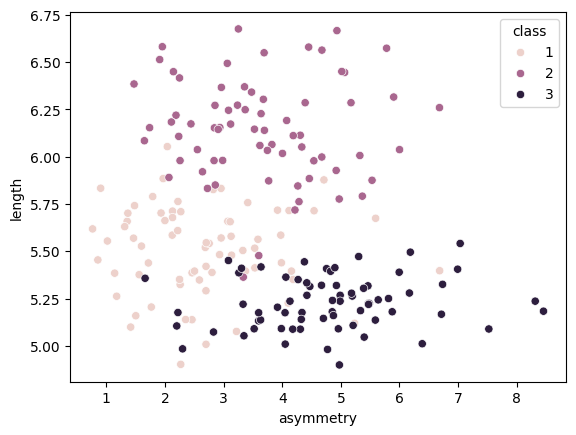

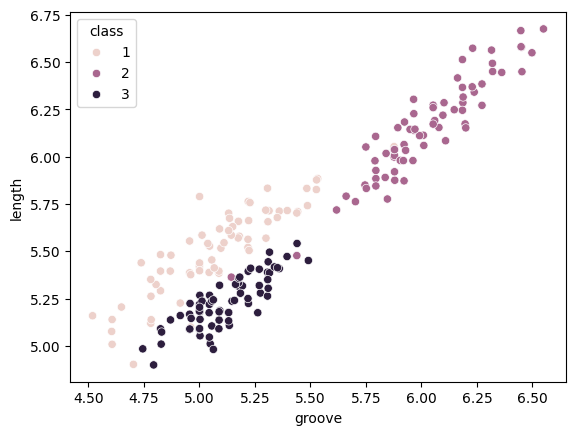

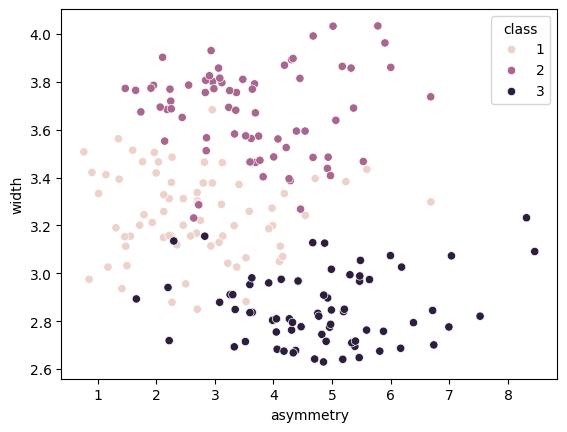

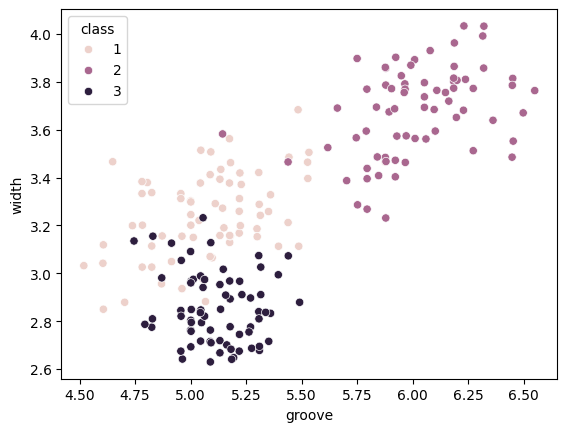

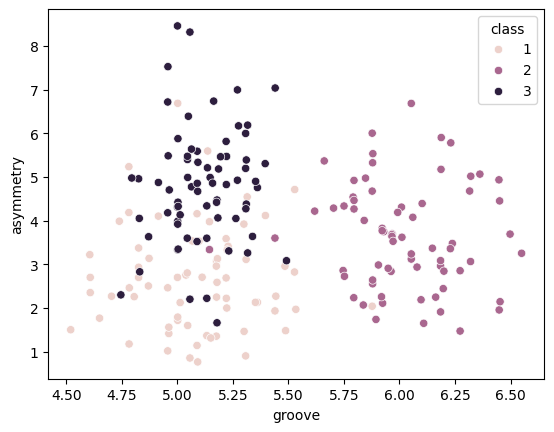

In [4]:
# for i in range(len(cols) - 1):
#   for j in range(i+1 , len(cols) -1):
#     plt.scatter(df[df.columns[j]],df[df.columns[i]])
#     plt.xlabel(df.columns[j])
#     plt.ylabel(df.columns[i])
#     plt.show()

for i in range(len(cols) -1):
  for j in range(i+1, len(cols) -1):
    xlabel= cols[j]
    ylabel= cols[i]
    sns.scatterplot(x=xlabel, y=ylabel, data=df, hue='class')
    plt.show()

# K Means Clustering

In [6]:
from sklearn.cluster import KMeans

In [31]:
kmeans_model = KMeans(n_clusters= 3)
x1 = 'asymmetry'
x0 = 'perimeter'
kmeans_model.fit(df[[x0,x1]].values)

KMeans(n_clusters=3)

In [32]:
clusters = kmeans_model.labels_

[]

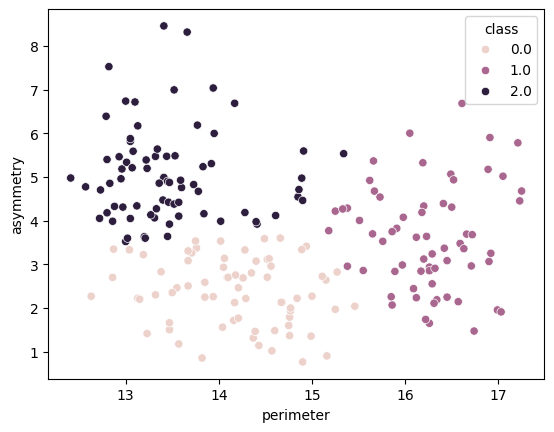

In [33]:
kmeans_cols = [x0,x1,'class']
data = np.hstack((df[[x0,x1]].values,clusters.reshape(-1,1)))
kmeans_df = pd.DataFrame(data,columns=kmeans_cols)
sns.scatterplot(x=x0,y=x1,data=kmeans_df,hue='class')
plt.plot()

# Higher Dimensions

In [34]:
kmeans_model.fit(df[df.columns[:-1]].values)

KMeans(n_clusters=3)

In [37]:
clusters = kmeans_model.labels_

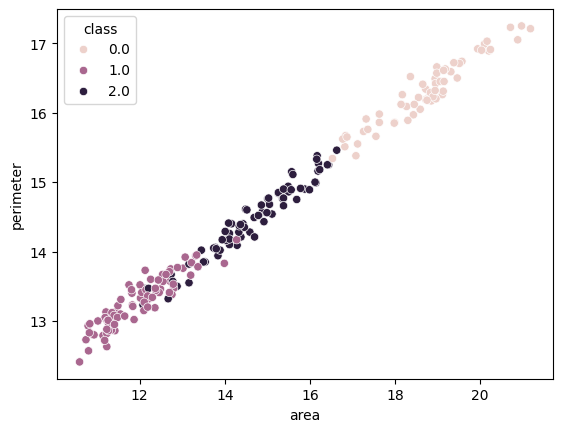

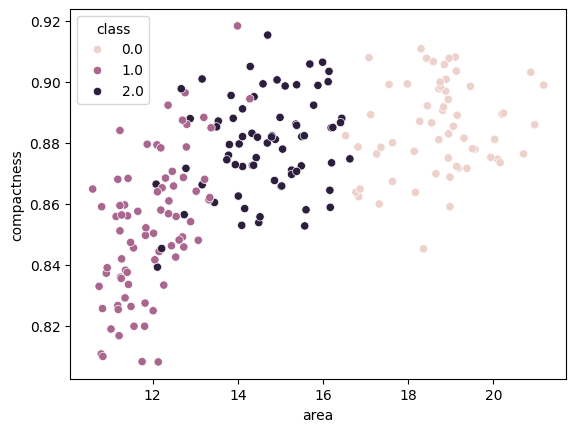

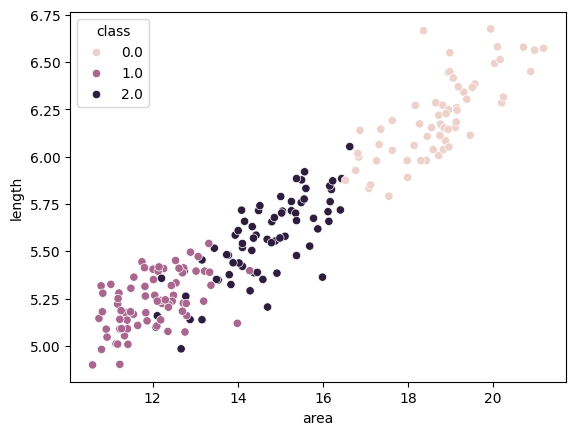

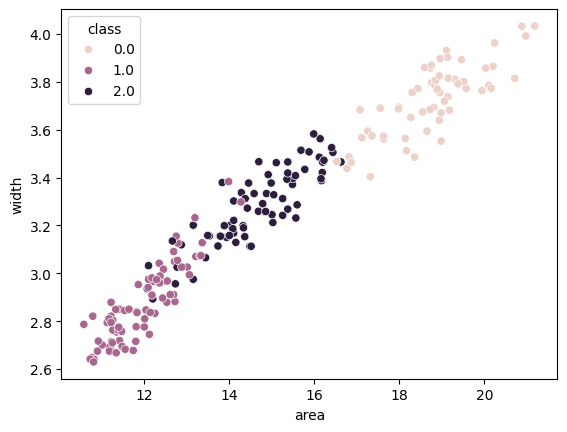

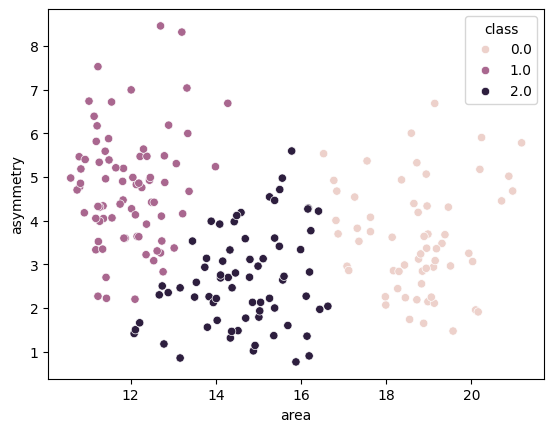

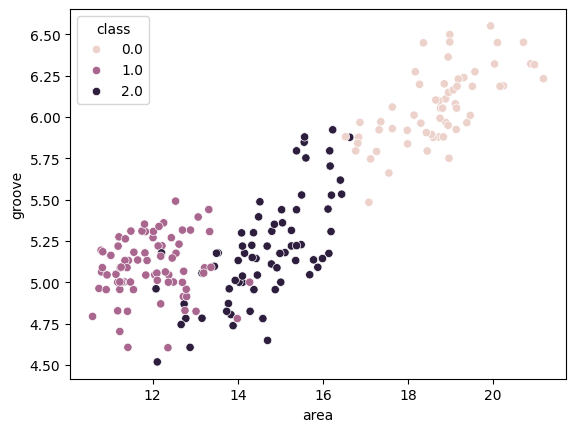

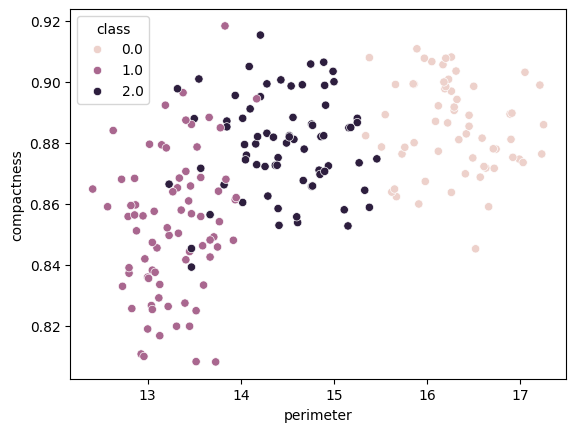

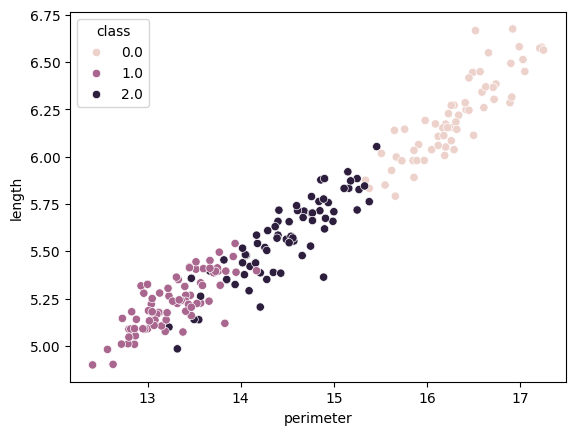

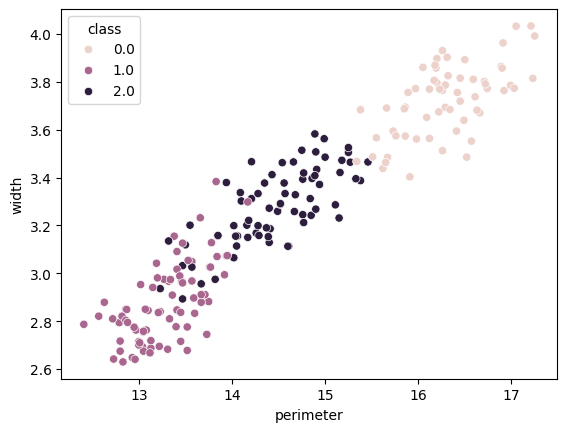

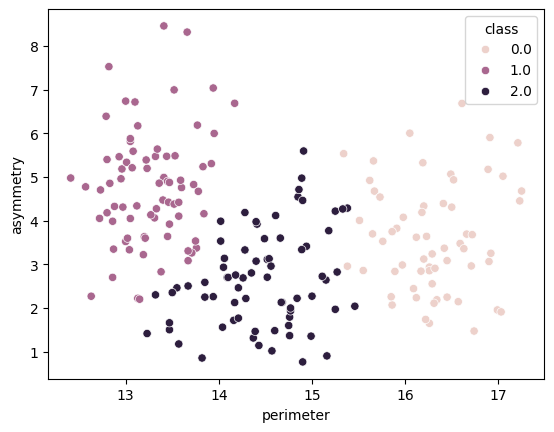

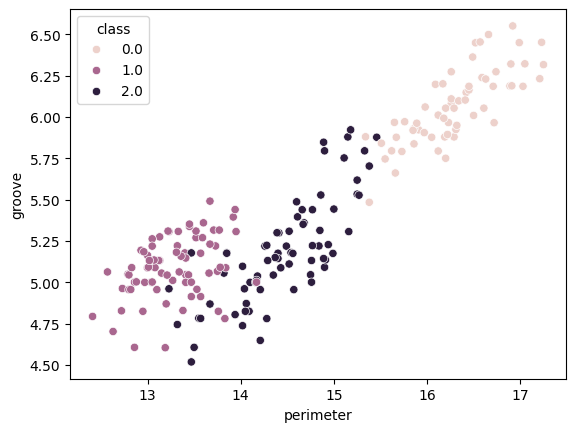

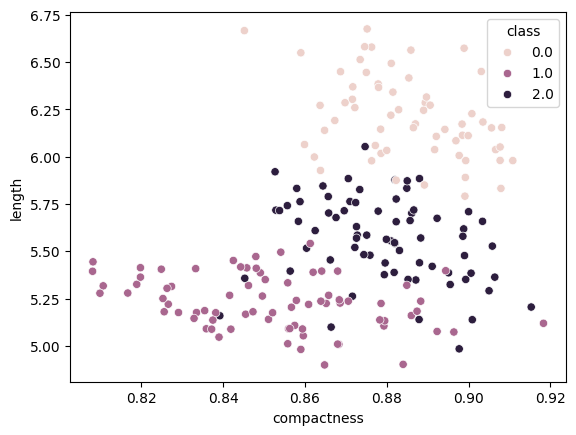

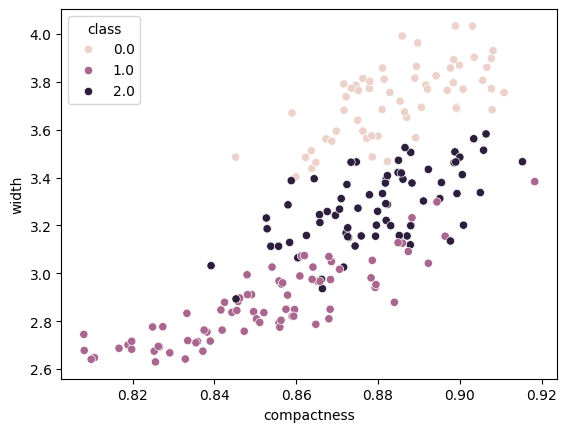

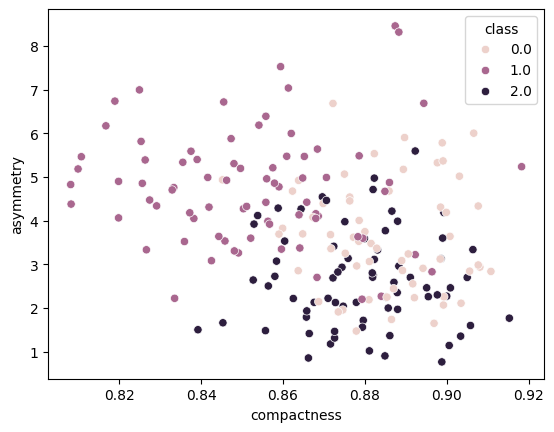

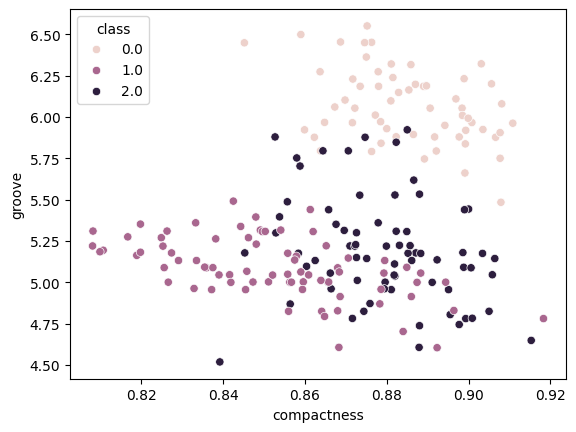

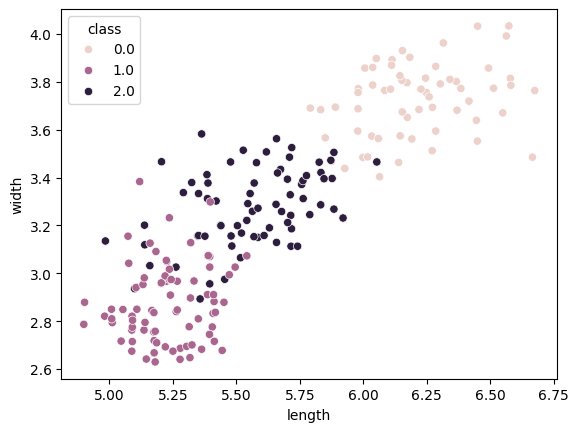

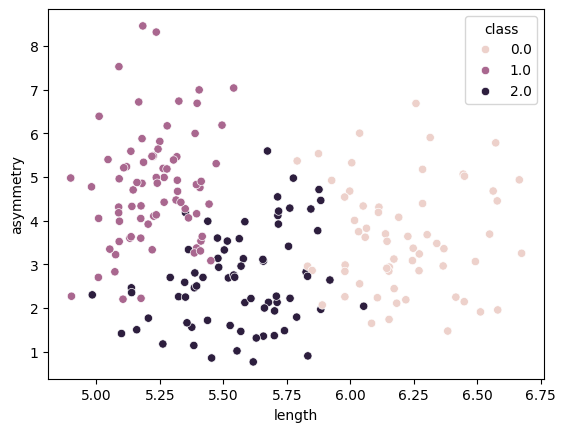

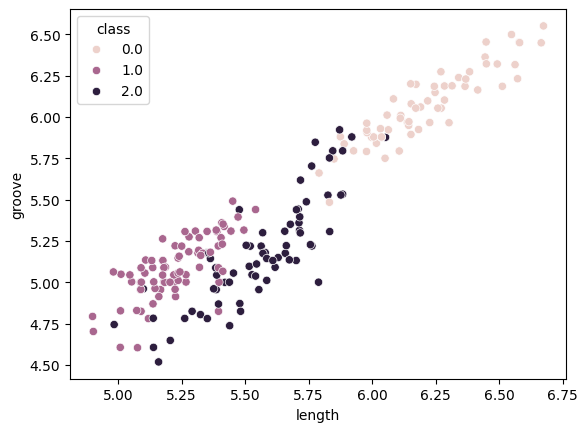

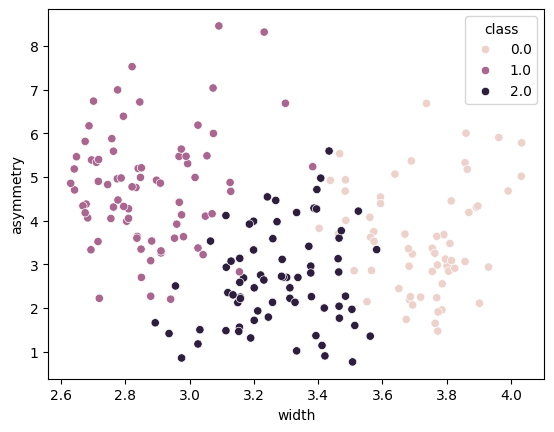

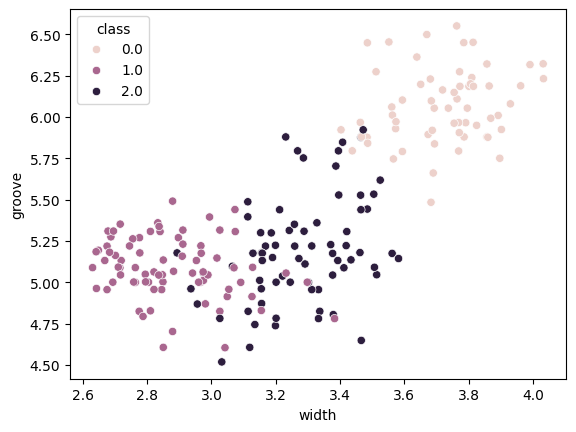

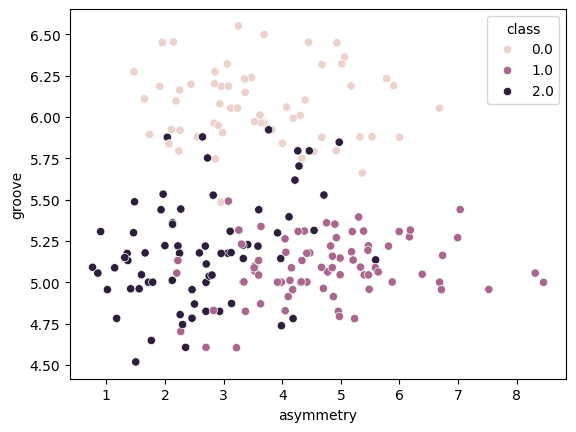

In [60]:
kmeans_cols = list(df.columns[:-1]) + ['class']
data = np.hstack((df[df.columns[:-1]].values,clusters.reshape(-1,1)))
kmeans_df = pd.DataFrame(data,columns = kmeans_cols)
for i in range(len(df.columns) - 1):
  for j in range(i+1 , len(df.columns) - 1):
    xlabel= kmeans_df.columns[i]
    ylabel= kmeans_df.columns[j]
    sns.scatterplot(data=kmeans_df[[xlabel,ylabel,'class']],y=ylabel,x=xlabel, hue ='class')
    plt.show()

Index(['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry',
       'groove'],
      dtype='object')

# PCA

In [66]:
from sklearn.decomposition import PCA

In [67]:
pca_model = PCA(n_components=2)
transformed_df= pca_model.fit_transform(df[df.columns[:-1]].values)

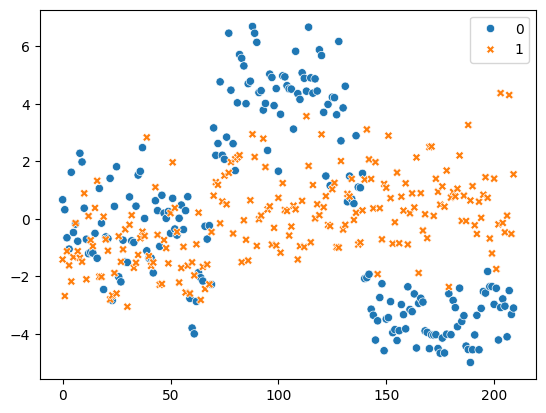

In [72]:
sns.scatterplot(transformed_df)
plt.show()

In [69]:
kmeans_pca_df = pd.DataFrame(np.hstack((transformed_df, kmeans_model.labels_.reshape(-1, 1))), columns=['pca1', 'pca2', 'class'])
truth_pca_df = pd.DataFrame(np.hstack((transformed_df, df['class'].values.reshape(-1, 1))), columns=['pca1', 'pca2', 'class'])

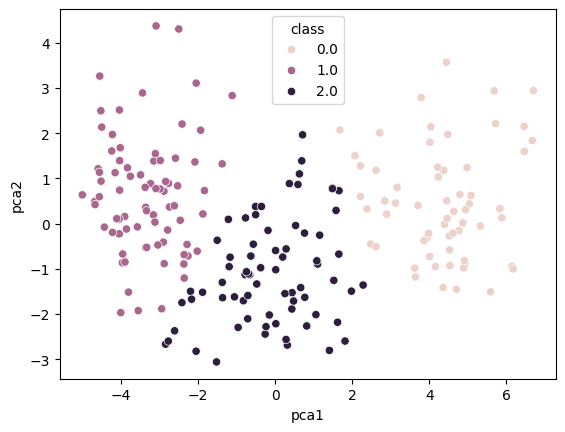

In [71]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=kmeans_pca_df)
plt.show()

[]

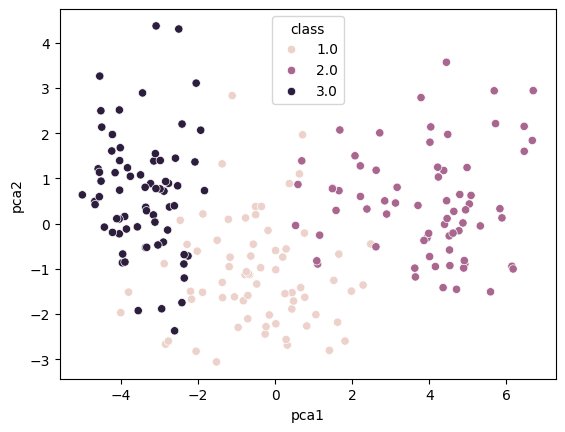

In [73]:
sns.scatterplot(x="pca1", y="pca2", hue='class', data=truth_pca_df)
plt.plot()